# How do insurance companies rank on fossil fuels?

This notebook analyses data collected by Unfriend Coal for their 2019 scorecard.

The raw data were obtained from the link at the bottom of this site.

https://unfriendcoal.com/2019scorecard/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
rawdata_filename = 'C:/Users/David Brown/Documents/PythonScripts_New/Climate Crisis/uc_insurers_2020/Unfriend Coal/Unfriend Coal_Insure Our Future_Scoring sheet - Scorecard 2019.xlsx'

In [3]:
# Load all sheets
rawdata_excel = pd.read_excel(rawdata_filename, sheet_name=None)

In [4]:
# Get sheet names
sheet_names = list(rawdata_excel.keys())
sheet_names

['Underwriting',
 'Ranking  per category',
 'Overall scores',
 'Investment',
 'Other Climate leadership']

In [5]:
# Save figures in appropriate folders
png_folder = 'png_figures/'
pdf_folder = 'pdf_figures/'

## Let's tackle these in order

In [6]:
underwriting = pd.read_excel(rawdata_filename, sheet_name=sheet_names[0])
underwriting

,UNDERWRITING,Unnamed: 1,Unnamed: 2,AIG,Allianz,Aviva,AXA 2017,AXA 2019,Axis Capital,Berkshire Hathaway,...,Zurich,Prudential,Samsung FM,SOMPO,TIAA Family,Tokio Marine,SCOR,Sinosure,Swiss Re,W.R. Berkley
0,1.1,Policy,Does the insurance company have a public and d...,0.0,1,1,1,1,1,0.0,...,1,NaN,0.0,0,NaN,0.0,1,0.0,1,0.0
1,1.2,Scope - Type of fossil fuels,Which fossil fuel sectors are subject to under...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Coal,0.0,3,1.5,3,3.5,3,0.0,...,3,NaN,0.0,0,NaN,0.0,3,0.0,3.5,0.0
3,NaN,NaN,Tar sands,0.0,0,0,1.5,1.5,1.5,0.0,...,1.5,NaN,0.0,0,NaN,0.0,0,0.0,1.5,0.0
4,NaN,NaN,Any other fossil fuel sub-sector e.g. Arctic o...,NaN,0,0,0.5,0.5,0,0.0,...,0.25,NaN,NaN,0,NaN,0.0,0,0.0,0.25,NaN
5,NaN,NaN,Does the policy apply to all fossil fuels?,0.0,0,0,0,0,0,0.0,...,0,NaN,0.0,0,NaN,0.0,0,0.0,0,0.0
6,1.3,Companies' exclusion threshold,What thresholds are used to define companies t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Coal,0.0,0,0,0,3,2,0.0,...,3,NaN,0.0,0,NaN,0.0,0,0.0,3,NaN
8,NaN,NaN,Threshold calculation,0.0,0,0,0,0,-,0.0,...,-,NaN,0.0,0,NaN,0.0,0,0.0,-,0.0
9,NaN,NaN,Tar sands,0.0,0,0,0,0,2,0.0,...,1.5,NaN,0.0,0,NaN,0.0,0,0.0,0,0.0


In [7]:
#The format is a multi index. Column 3 
#We want one row per insurer
underwriting = pd.read_excel(rawdata_filename, sheet_name=sheet_names[0], index_col=[0,1,2])
underwriting

AIG  \
UNDERWRITING                                                                                           
1.1          Policy                          Does the insurance company have a public and de...  0.0   
1.2          Scope - Type of fossil fuels    Which fossil fuel sectors are subject to underw...  NaN   
                                             Coal                                                0.0   
                                             Tar sands                                           0.0   
                                             Any other fossil fuel sub-sector e.g. Arctic oi...  NaN   
                                             Does the policy apply to all fossil fuels?          0.0   
1.3          Companies' exclusion  threshold What thresholds are used to define companies th...  NaN   
                                             Coal                                                0.0   
                                             Threshold calculation                               0.0   
                                             Tar sands                                           0.0   
                                             Any other fossil fuel sub-sector e.g. Arctic oi...  NaN   
                                             Does the policy apply to all fossil fuels?          0.0   
                                             Additional points: The policy excludes these co...  0.0   
                                             Deductions                                          0.0   
1.4          No expansion                    Does the policy cover all new coal and tar sand...  NaN   
                                             Coal projects                                       0.0   
                                             Coal companies                                      0.0   
                                             Exemptions of the policy                            0.0   
                                             Tar sand projects                                   0.0   
                                             Tar sand companies                                  0.0   
1.5          Existing projects               Does the policy explicitly cover existing coal ...  NaN   
                                             Coal projects                                       0.0   
                                             Exemptions of the policy                            0.0   
                                             Tar sands                                           0.0   
1.6          Insurance only                  Does the policy apply to stand-alone and/or pac...  0.0   
                                             Additional points: The policy plans to graduall...  0.0   
                                             What is the share of insurance vs reinsurance e...  NaN   
1.7          Reinsurance Only                Does the policy apply to facultatives and/or tr...  0.0   
                                             Additional points: The policy plans to graduall...  0.0   
1.8          Phase out                       Does the policy plans a full phase out of insur...  NaN   
                                             Coal                                                0.0   
                                             Tar sands                                           0.0   
                                             Additional points: The policy commits to gradua...  0.0   
                                             Additional points: The policy requires from com...  0.0   
1.9          Disclosure                      Does the insurance company disclose:                NaN   
                                             Its estimation of how much premiums will be los...  0.0   
                                             The number of policy coverage linked to fossil ...  0.0   
                                         

In [8]:
# Fix the 3rd index
# Pull the questions from a section header to the multi-index.

In [9]:
#Subset by rows with all NaN values

#find null values
null_values = underwriting.isnull()

#find rows (axis=1)  that are all null
null_row = list(null_values.all(axis=1))

#subset the original dataframe
section_questions = underwriting.loc[null_row, :]

#get the questions from the third row of
question = list(section_questions.index.get_level_values(2))

#also get the section index from the first row
section = list(section_questions.index.get_level_values(0))

for section, question in zip(section, question):
    print(section, question)

1.2 Which fossil fuel sectors are subject to underwriting restrictions? 
1.3 What thresholds are used to define companies that are subject to underwriting restrictions, and from what kind of coverage are these companies excluded ? Be as specific as possible.
1.4 Does the policy cover all new coal and tar sands mining, power and coal-related infrastructures projects, as well as coverage for companies planning an expansion of their coal power capacity or tar sands activity (and coal mining activity)?
1.5 Does the policy explicitly cover existing coal mining, power and coal-related infrastructures projects, as well as tar sands mining, transport and infrastructures projects?
1.8 Does the policy plans a full phase out of insurance coverage to coal and tar sands sector ? 
1.9 Does the insurance company disclose:


In [10]:
data_row =[not row for row in null_row]

In [11]:
#Now remove the null rows, and add the section questions as a index.
#Might be easier the other way around.

#No, just strip this data and keep it as a separate dictionary.
underwriting_clean = underwriting.loc[data_row, :]
underwriting_clean

AIG  \
UNDERWRITING                                                                                           
1.1          Policy                          Does the insurance company have a public and de...  0.0   
1.2          Scope - Type of fossil fuels    Coal                                                0.0   
                                             Tar sands                                           0.0   
                                             Any other fossil fuel sub-sector e.g. Arctic oi...  NaN   
                                             Does the policy apply to all fossil fuels?          0.0   
1.3          Companies' exclusion  threshold Coal                                                0.0   
                                             Threshold calculation                               0.0   
                                             Tar sands                                           0.0   
                                             Any other fossil fuel sub-sector e.g. Arctic oi...  NaN   
                                             Does the policy apply to all fossil fuels?          0.0   
                                             Additional points: The policy excludes these co...  0.0   
                                             Deductions                                          0.0   
1.4          No expansion                    Coal projects                                       0.0   
                                             Coal companies                                      0.0   
                                             Exemptions of the policy                            0.0   
                                             Tar sand projects                                   0.0   
                                             Tar sand companies                                  0.0   
1.5          Existing projects               Coal projects                                       0.0   
                                             Exemptions of the policy                            0.0   
                                             Tar sands                                           0.0   
1.6          Insurance only                  Does the policy apply to stand-alone and/or pac...  0.0   
                                             Additional points: The policy plans to graduall...  0.0   
                                             What is the share of insurance vs reinsurance e...  NaN   
1.7          Reinsurance Only                Does the policy apply to facultatives and/or tr...  0.0   
                                             Additional points: The policy plans to graduall...  0.0   
1.8          Phase out                       Coal                                                0.0   
                                             Tar sands                                           0.0   
                                             Additional points: The policy commits to gradua...  0.0   
                                             Additional points: The policy requires from com...  0.0   
1.9          Disclosure                      Its estimation of how much premiums will be los...  0.0   
                                             The number of policy coverage linked to fossil ...  0.0   
                                             The disclosed KPIs are broken down per type of ...  0.0   
                                             The disclosed KPIs are broken down per type of ...  0.0   
                                             Total score - underwriting                          0.0   

                                                                                                Allianz  \
UNDERWRITING                                                                                              
1.1          Policy                          Does the insurance company have a public and de...       1   
1.2          Scope - Type of fo

In [12]:
#Get the last column, containing the Underwriting Totals
df = underwriting_clean.T

total_score = df[df.columns[-1]]
total_score.reset_index()

,index,1.9
,,Disclosure
,,Total score - underwriting
0,AIG,0
1,Allianz,0.21
2,Aviva,0.11
3,AXA 2017,0.32
4,AXA 2019,0.47
5,Axis Capital,0.27
6,Berkshire Hathaway,0
7,Chubb,0.17


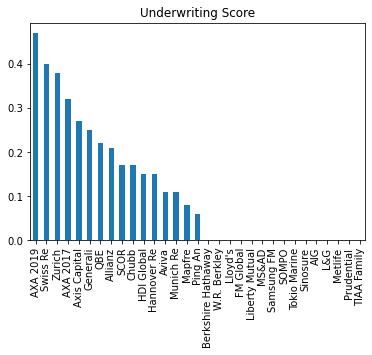

In [13]:
total_score.sort_values(ascending=False).plot.bar();
plt.title('Underwriting Score');

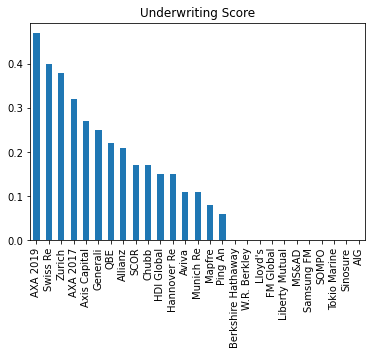

In [14]:
# Drop NA so that companies with zeros scores are distinguished from those without data
total_score.dropna().sort_values(ascending=False).plot.bar();
plt.title('Underwriting Score');

## Try the next sheet

In [15]:
ranking_per_category = pd.read_excel(rawdata_filename, sheet_name=sheet_names[1])
ranking_per_category
#This is actually 3 data frames

underwriting_ranking = ranking_per_category.iloc[:,[1,2]]

investment_ranking = ranking_per_category.iloc[:,[5,6]]

leadership_ranking = ranking_per_category.iloc[:,[9,10]]


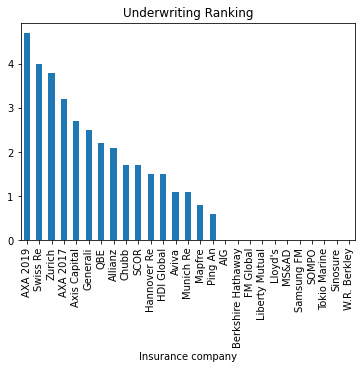

In [16]:
underwriting_ranking.dropna().plot.bar(0, 1);
plt.title('Underwriting Ranking');
plt.legend().remove()

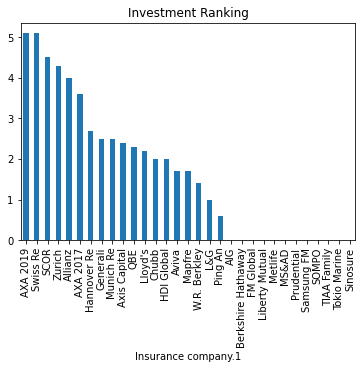

In [17]:
investment_ranking.dropna().plot.bar(0, 1);
plt.title('Investment Ranking');
plt.legend().remove()

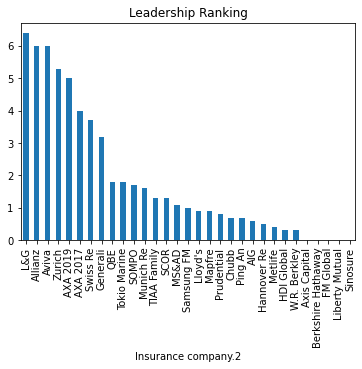

In [18]:
leadership_ranking.dropna().plot.bar(0, 1);
plt.title('Leadership Ranking');
plt.legend().remove()

## Try sheet 3

In [19]:
overall = pd.read_excel(rawdata_filename, sheet_name=sheet_names[2], header=None)

#For some reason the header is at the bottom.
overall.columns = list(overall.tail(1).reset_index(drop=True).loc[0,:])
overall.drop(overall.tail(1).index, inplace=True)
overall

,Insurance company,Underwriting,Investing,Other CL
0,AIG,0,0,0.6
1,Berkshire Hathaway,0,0,0
2,FM Global,0,0,0
3,Liberty Mutual,0,0,0
4,Lloyd's,0,2.2,0.9
5,MS&AD,0,0,1.1
6,Samsung FM,0,0,1
7,SOMPO,0,0,1.7
8,Tokio Marine,0,0,1.8
9,Sinosure,0,0,0


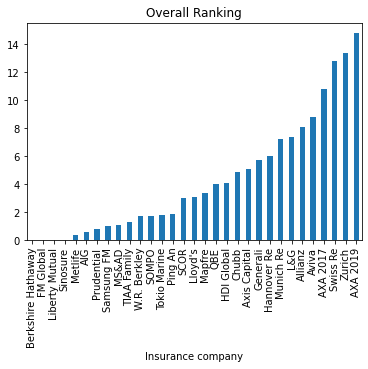

In [20]:
overall['Sum'] = overall.convert_dtypes().sum(axis=1)
overall.sort_values('Sum').plot.bar('Insurance company', 'Sum');
plt.legend().remove()
plt.title('Overall Ranking');

## Read in UC insurance totals and cross compare

In [21]:
uc_insurance_totals = pd.read_pickle('C:/Users/David Brown/Documents/PythonScripts_New/Climate Crisis/uc_insurers_2020/uc_insurance_totals.pkl')

In [22]:
uc_insurance_totals

,Carrier,Premium
0,Liberty Mutual Insurance Company,8022010.00
1,Zurich American Insurance Company,5774554.00
2,Safety National,4794656.00
3,SwissRe,2710312.50
4,Beazley,2628937.63
...,...,...
70,Liberty Mutual,12650.00
71,Endurance Risk Solutions,12650.00
72,AUW,11750.00
73,NOA,10500.00


In [23]:
names = list(overall.columns)
names[0] = 'Carrier'
overall.columns = names

overall

,Carrier,Underwriting,Investing,Other CL,Sum
0,AIG,0,0,0.6,0.6
1,Berkshire Hathaway,0,0,0,0.0
2,FM Global,0,0,0,0.0
3,Liberty Mutual,0,0,0,0.0
4,Lloyd's,0,2.2,0.9,3.1
5,MS&AD,0,0,1.1,1.1
6,Samsung FM,0,0,1,1.0
7,SOMPO,0,0,1.7,1.7
8,Tokio Marine,0,0,1.8,1.8
9,Sinosure,0,0,0,0.0


In [24]:
combined = pd.merge(uc_insurance_totals, overall, on='Carrier', how='outer')

#May need to remove capitalisation  and trailing spacing before merging
combined

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
0,Liberty Mutual Insurance Company,8022010.00,NaN,NaN,NaN,NaN
1,Zurich American Insurance Company,5774554.00,NaN,NaN,NaN,NaN
2,Safety National,4794656.00,NaN,NaN,NaN,NaN
3,SwissRe,2710312.50,NaN,NaN,NaN,NaN
4,Beazley,2628937.63,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,AXA 2019,NaN,4.7,5.1,5,14.8
96,L&G,NaN,NaN,1,6.4,7.4
97,Metlife,NaN,NaN,0,0.4,0.4
98,Prudential,NaN,NaN,0,0.8,0.8


In [25]:
def prep_for_merge(df, column):
    
    #remove trailing spaces
    df[column] = df[column].str.strip()
    
    #lowercase
    df[column] = df[column].str.lower()
    
    return df

In [26]:
uc_insurance_totals

,Carrier,Premium
0,Liberty Mutual Insurance Company,8022010.00
1,Zurich American Insurance Company,5774554.00
2,Safety National,4794656.00
3,SwissRe,2710312.50
4,Beazley,2628937.63
...,...,...
70,Liberty Mutual,12650.00
71,Endurance Risk Solutions,12650.00
72,AUW,11750.00
73,NOA,10500.00


In [27]:
prep_for_merge(uc_insurance_totals, 'Carrier')

,Carrier,Premium
0,liberty mutual insurance company,8022010.00
1,zurich american insurance company,5774554.00
2,safety national,4794656.00
3,swissre,2710312.50
4,beazley,2628937.63
...,...,...
70,liberty mutual,12650.00
71,endurance risk solutions,12650.00
72,auw,11750.00
73,noa,10500.00


In [28]:
combined = pd.merge(prep_for_merge(uc_insurance_totals, 'Carrier'), prep_for_merge(overall, 'Carrier'), on='Carrier', how='outer')
combined

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
0,liberty mutual insurance company,8022010.00,NaN,NaN,NaN,NaN
1,zurich american insurance company,5774554.00,NaN,NaN,NaN,NaN
2,safety national,4794656.00,NaN,NaN,NaN,NaN
3,swissre,2710312.50,NaN,NaN,NaN,NaN
4,beazley,2628937.63,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,axa 2019,NaN,4.7,5.1,5,14.8
96,l&g,NaN,NaN,1,6.4,7.4
97,metlife,NaN,NaN,0,0.4,0.4
98,prudential,NaN,NaN,0,0.8,0.8


In [29]:
#'Swiss Re' is listed as 'Swissre' in the UC dataset
# How many names end in 're'?
combined[combined.Carrier.str.endswith('re')]

# It seems to be a one off error.

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
3,swissre,2710312.5,NaN,NaN,NaN,NaN
36,hannover re,260000.0,1.5,4,0.5,6.0
49,ironshore,106050.0,NaN,NaN,NaN,NaN
64,berkley offshore,22137.5,NaN,NaN,NaN,NaN
82,sinosure,NaN,0,0,0,0.0
85,mapfre,NaN,0.8,1.7,0.9,3.4
87,munich re,NaN,1.1,4.5,1.6,7.2
94,swiss re,NaN,4,5.1,3.7,12.8


In [30]:
#Replace 'swissre' with 'swiss re'
combined.Carrier = combined.Carrier.replace('swissre', 'swiss re')

In [31]:
# Look for nested matchings
# Make a mapping dictionary 'key' = long name, 'value' = shorter name
nested = dict()

string_list = combined.Carrier.sort_values()
substrings  = combined.Carrier.sort_values()

for x in string_list:
    for y in substrings:
        if y != x:
            if y in x:
                nested.update({x:y})

nested

{'allied world assurance company us inc': 'allied world',
 'allied world bermuda': 'allied world',
 'berkshire hathaway inc': 'berkshire hathaway',
 'brit axis': 'brit',
 'chubb bermuda': 'chubb',
 'great american assurance company': 'great american',
 'great american insurance company': 'great american',
 'hannover re': 'hannover',
 'hdu/noa': 'noa',
 'hiscox markel': 'hiscox',
 'kln/fidelis': 'fidelis',
 'landmark (rsui)': 'rsui',
 'liberty mutual insurance company': 'liberty mutual',
 'sompo holdings inc': 'sompo',
 'starr indemnity and liability company': 'starr indemnity',
 'zurich american insurance company': 'zurich',
 'zurich insurance company': 'zurich'}

In [32]:
# Map longer names onto shorter ones.
# This makes assumptions about the relationship of abbreviated names.
tidy = combined.copy()
tidy.Carrier = tidy.Carrier.replace(nested)
tidy

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
0,liberty mutual,8022010.00,NaN,NaN,NaN,NaN
1,zurich,5774554.00,NaN,NaN,NaN,NaN
2,safety national,4794656.00,NaN,NaN,NaN,NaN
3,swiss re,2710312.50,NaN,NaN,NaN,NaN
4,beazley,2628937.63,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,axa 2019,NaN,4.7,5.1,5,14.8
96,l&g,NaN,NaN,1,6.4,7.4
97,metlife,NaN,NaN,0,0.4,0.4
98,prudential,NaN,NaN,0,0.8,0.8


In [33]:
tidy = tidy.convert_dtypes()

In [34]:
# look at duplicates
tidy[tidy.Carrier.duplicated()]

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
11,chubb,1014110.0,NaN,NaN,NaN,NaN
14,brit,858900.0,NaN,NaN,NaN,NaN
36,hannover,260000.0,1.5,4.0,0.5,6.0
38,allied world,221332.0,NaN,NaN,NaN,NaN
40,allied world,207000.0,NaN,NaN,NaN,NaN
41,hiscox,176884.0,NaN,NaN,NaN,NaN
53,starr indemnity,100000.0,NaN,NaN,NaN,NaN
57,rsui,65000.0,NaN,NaN,NaN,NaN
59,great american,57655.0,NaN,NaN,NaN,NaN
65,fidelis,19125.0,NaN,NaN,NaN,NaN


In [35]:
# Aggregate but treat NAs and zeros differently.
#By setting min_count=1, numeric values will overwrite NaN values.
tidy = tidy.groupby('Carrier').sum(min_count=1).sort_values('Premium', ascending=False).reset_index()
tidy

,Carrier,Premium,Underwriting,Investing,Other CL,Sum
0,liberty mutual,8034660.0,0.0,0.0,0.0,0.0
1,zurich,5793529.0,3.8,4.3,5.3,13.4
2,safety national,4794656.0,NaN,NaN,NaN,NaN
3,swiss re,2710312.5,4.0,5.1,3.7,12.8
4,chubb,2665148.0,1.7,2.5,0.7,4.9
...,...,...,...,...,...,...
77,scor,NaN,1.7,NaN,1.3,3.0
78,sinosure,NaN,0.0,0.0,0.0,0.0
79,tiaa family,NaN,NaN,0.0,1.3,1.3
80,tokio marine,NaN,0.0,0.0,1.8,1.8


In [36]:
# Need to treat NaN and zero differently. 

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text major ticklabel objects>)

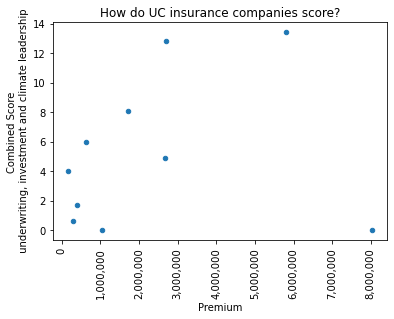

In [37]:
tidy.plot('Premium', 'Sum', kind='scatter');
plt.title('How do UC insurance companies score?');
plt.ylabel('Combined Score\n underwriting, investment and climate leadership');

#Fix axis
#Give dollars with zeros and commas
plt.gca().get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=90)

#Label points

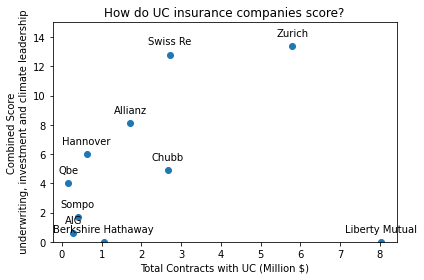

In [38]:
xs = tidy.Premium / 1000000
ys = tidy.Sum

labels = tidy.Carrier.str.title()

#Recapitalize AIG
labels = [label.replace('Aig', 'AIG') for label in labels]

plt.scatter(xs, ys);
plt.title('How do UC insurance companies score?');
plt.ylabel('Combined Score\n underwriting, investment and climate leadership');
plt.xlabel('Total Contracts with UC (Million $)');
plt.ylim(0,15);


n=int(0)

# zip joins x and y coordinates in pairs
for x, y in zip(xs,ys):

    label = labels[n]

    # this method is called for each point
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    n+=1

plt.tight_layout();
plt.savefig( pdf_folder + 'How do UC insurance companies score.pdf')
plt.savefig( png_folder + 'How do UC insurance companies score.png')

In [39]:
#How do UC insurance companies rank?
#Percentage of insurance spending by score.

In [40]:
# Get Parents for these companies by google search?
# Need a system to track companies through changing names, based on stock abreviation?

In [41]:
list(combined.Carrier.sort_values().reset_index(drop=True))

['ace american insurance company',
 'aig',
 'allianz',
 'allied world',
 'allied world assurance company us inc',
 'allied world bermuda',
 'american international group inc',
 'ano',
 'ascot',
 'aspen',
 'auw',
 'aviva',
 'axa 2017',
 'axa 2019',
 'axa xl',
 'axis capital',
 'axis insurance company',
 'axis specialty europe',
 'barbican',
 'beazley',
 'berkley offshore',
 'berkshire hathaway',
 'berkshire hathaway inc',
 'brit',
 'brit axis',
 'capitol specialty',
 'cgm/hdu/tmk/lib',
 'channel barnican',
 'chaucer',
 'chubb',
 'chubb bermuda',
 'convex',
 'coverys',
 'darwin (awac)',
 'echo',
 'endurance risk solutions',
 'fiat lux',
 'fidelis',
 'fm global',
 'generali',
 'great american',
 'great american assurance company',
 'great american insurance company',
 'hannover',
 'hannover re',
 'hdi global',
 'hdu/noa',
 'hiscox',
 'hiscox markel',
 'homeland (one beacon)',
 'htb',
 'ironshore',
 'kln/fidelis',
 'l&g',
 'landmark (rsui)',
 'liberty bermuda',
 'liberty mutual',
 'liberty